In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


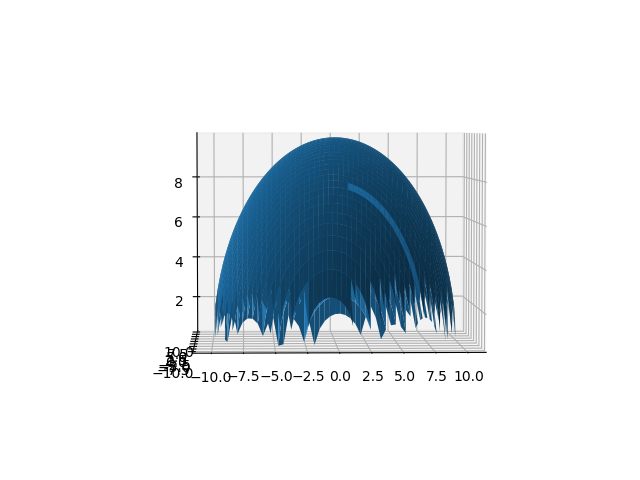

C:\Users\Carlos Eduardo\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  
C:\Users\Carlos Eduardo\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  app.launch_new_instance()


In [9]:
# Esfera 3D

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

ax = plt.figure() .gca( projection = '3d' )

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

X, Y  = np.meshgrid(x, y)
Z = (100 - (X**2 + Y**2))**(1/2)

paraboloide = ax.plot_surface(X, Y, Z)

plt.show()

# Parabolóide

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib notebook


def funcaoZ(X, Y):
    return X**2 + Y**2


def derivadaX(x_anterior, x_posterior, y, h):
    return (funcaoZ(x_posterior,y) - funcaoZ(x_anterior,y)) / (2*h)  


def derivadaY(x, y_anterior, y_posterior, h):
    return (funcaoZ(x,y_posterior) - funcaoZ(x,y_anterior)) / (2*h)    


def primeiraFF(X, Y, h, amostra_pontos):
    dX, dY = [], []
    
    for k in range(len(amostra_pontos)):
        i, j = amostra_pontos[k]
        dX.append(derivadaX(X[i][j-1], X[i][j+1], Y[i][j], h))
        dY.append(derivadaY(X[i][j], Y[i-1][j], Y[i+1][j], h))

    E, F, G = [], [], []
    
    for i in range(len(dX)):
        E.append(1 + dX[i]**2)
        F.append(dX[i] * dY[i])
        G.append(1 + dY[i]**2)      
    
    return E, F, G


def dominio(esquerdo_x, direito_x, inferior_y, superior_y, qtd_pontos):
    x, y = np.linspace(esquerdo_x, direito_x, qtd_pontos), np.linspace(inferior_y, superior_y, qtd_pontos)   
    X, Y = np.meshgrid(x, y)
    
    dominioXY = []
    
    for i in range(1, qtd_pontos - 1):
        for j in range(1, qtd_pontos - 1):
            dominioXY.append((i,j))

    return X, Y, dominioXY


def amostra(X, Y, dominioXY, qtd_pontos):
    random.shuffle(dominioXY)
    
    qtd_dominio = len(dominioXY)
    qtd_amostra = qtd_dominio // 2

    if qtd_dominio > qtd_amostra:
        for i in range(qtd_dominio - qtd_amostra):
            dominioXY.pop()

    return dominioXY


def plotar2D(X, Y, amostra_pontos = []):
    if len(amostra_pontos) == 0:
        plt.scatter(X,Y)

        plt.show()
    else:
        amostraX, amostraY = [], []
        
        for k in range(len(amostra_pontos)):
            i, j = amostra_pontos[k]
            
            amostraX.append(X[i][j]) 
            amostraY.append(Y[i][j])

        plt.scatter(amostraX,amostraY)

        plt.show()
    
    return None


def plotar3D(X, Y, Z, amostra_pontos = []):
    if len(amostra_pontos) == 0:   
        plt.figure() .add_subplot(111, projection='3d') .scatter(X, Y, Z)

        plt.show()
    else:
        amostraX, amostraY, amostraZ = [], [], []

        for k in range(len(amostra_pontos)):
            i, j = amostra_pontos[k]

            amostraX.append(X[i][j]) 
            amostraY.append(Y[i][j])
            amostraZ.append(Z[i][j])

        plt.figure() .add_subplot(111, projection='3d') .scatter(amostraX, amostraY, amostraZ) # gca

        plt.show()

    return None


def main():
    esquerdo_x, direito_x = -10, 10
    inferior_y, superior_y = -10 , 10
    qtd_pontos = 10
    X, Y, dominioXY = dominio(esquerdo_x, direito_x, inferior_y, superior_y, qtd_pontos)
    
    amostra_pontos = amostra(X, Y, dominioXY, qtd_pontos)
    
    #Z = funcaoZ(X, Y)
    #plotar2D(X, Y)
    #plotar3D(X, Y, Z)
    #plotar2D(X, Y, amostra_pontos)
    #plotar3D(X, Y, Z, amostra_pontos)
        
    h = X[0][1] - X[0][0]

    E, F, G = primeiraFF(X, Y, h, amostra_pontos)

    print(" E ")
    print(E)
    print("\n F ")
    print(F)
    print("\n G ")
    print(G)
    
    return None


main()

 E 
[45.44444444444449, 242.97530864197526, 124.45679012345683, 242.97530864197526, 124.45679012345683, 5.938271604938274, 5.938271604938266, 242.97530864197526, 5.938271604938272, 242.97530864197526, 5.938271604938268, 124.45679012345683, 242.97530864197503, 124.45679012345683, 5.93827160493828, 242.97530864197515, 242.97530864197526, 45.44444444444449, 242.97530864197526, 45.44444444444449, 242.97530864197526, 124.45679012345683, 124.45679012345678, 124.45679012345683, 45.44444444444449, 5.938271604938272, 5.938271604938272, 45.44444444444442, 124.45679012345678, 242.97530864197535, 124.45679012345678, 45.44444444444447]

 F 
[-44.444444444444464, -34.5679012345679, -172.8395061728395, 34.5679012345679, 74.07407407407413, -4.938271604938271, 24.691358024691343, -241.9753086419752, 34.5679012345679, -103.70370370370365, -4.938271604938271, 123.45679012345683, 172.83950617283944, -24.69135802469136, 24.691358024691382, -241.9753086419752, -172.8395061728395, -103.70370370370375, -34.56

# Esfera

In [3]:
import random
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook


def funcaoZ(X, Y):
    return np.sqrt(100 - (X**2 + Y**2))


def derivadaX(x_anterior, x_posterior, y, h):
    return (funcaoZ(x_posterior, y) - funcaoZ(x_anterior, y)) / (2*h)


def derivadaY(x, y_anterior, y_posterior, h):
    return (funcaoZ(x, y_posterior) - funcaoZ(x, y_anterior)) / (2*h)


def primeiraFF(X, Y, h, amostra_pontos):
    dX, dY = [], []
    
    for k in range(len(amostra_pontos)):
        i, j = amostra_pontos[k]
        
        dX.append(derivadaX(X[i][j-1], X[i][j+1], Y[i][j], h)) 
        dY.append(derivadaY(X[i][j], Y[i-1][j], Y[i+1][j], h))

    E, F, G = [], [], []

    for i in range(len(dX)):
        E.append(1 + dX[i]**2)
        F.append(dX[i]*dY[i])
        G.append(1 + dY[i]**2)
    
    return E, F, G


def dominio(esquerdo_x, direito_x, inferior_y, superior_y, qtd_pontos):
    x, y = np.linspace(esquerdo_x, direito_x, qtd_pontos), np.linspace(inferior_y, superior_y, qtd_pontos)   
    X, Y = np.meshgrid(x, y)

    dominioXY = []
    raio = 100

    for j in range(1, qtd_pontos - 1):
        for i in range(1, qtd_pontos - 1):
            if X[i][j]**2 + Y[i][j]**2 <= raio and X[i+1][j-1]**2 + Y[i+1][j-1]**2 <= raio and X[i+1][j+1]**2 + Y[i+1][j+1]**2 <= raio:
                break
        
        linha_superior = i + 1
        
        for i in range(qtd_pontos - 2,0,-1):
            if X[i][j]**2 + Y[i][j]**2 <= raio and X[i-1][j-1]**2 + Y[i-1][j-1]**2 <= raio and X[i-1][j+1]**2 + Y[i-1][j+1]**2 <= raio:
                break
        
        linha_inferior = i

        for i in range(linha_superior, linha_inferior):
            dominioXY.append((i, j))
    
    return X, Y, dominioXY


def amostra(dominioXY, qtd_pontos):
    random.shuffle(dominioXY)
    
    qtd_dominio = len(dominioXY)
    qtd_amostra = qtd_dominio // 2

    if qtd_dominio > qtd_amostra:
        for i in range(qtd_dominio - qtd_amostra):
            dominioXY.pop()
    
    return dominioXY


def plotar2D(X, Y, amostra_pontos = []):
    if len(amostra_pontos) == 0:
        plt.scatter(X,Y)

        plt.show()
    else:
        amostraX, amostraY = [], []
        
        for k in range(len(amostra_pontos)):
            i, j = amostra_pontos[k]
            
            amostraX.append(X[i][j]) 
            amostraY.append(Y[i][j])

        plt.scatter(amostraX,amostraY)

        plt.show()
    
    return None
    
    
def plotar3D(X, Y, Z, amostra_pontos = []):
    if len(amostra_pontos) == 0:   
        plt.figure() .add_subplot(111, projection='3d') .scatter(X, Y, Z)

        plt.show()
    else:
        amostraX, amostraY, amostraZ = [], [], []
        
        for k in range(len(amostra_pontos)):
            i, j = amostra_pontos[k]
            
            amostraX.append(X[i][j]) 
            amostraY.append(Y[i][j])
            amostraZ.append(Z[i][j])

        plt.figure() .add_subplot(111, projection='3d') .scatter(amostraX, amostraY, amostraZ)

        plt.show()
    
    return None


def main():
    esquerdo_x, direito_x = -10, 10
    inferior_y, superior_y = -10, 10
    qtd_pontos = 10
    
    X, Y, dominioXY = dominio(esquerdo_x, direito_x, inferior_y, superior_y, qtd_pontos)

    amostra_pontos = amostra(dominioXY, qtd_pontos)

    #Z = funcaoZ(X, Y) 
    #plotar2D(X, Y)
    #plotar3D(X, Y, Z)
    #plotar2D(X, Y, amostra_pontos)
    #plotar3D(X, Y, Z, amostra_pontos)

    h = X[0][1] - X[0][0]
    
    E, F, G = primeiraFF(X, Y, h, amostra_pontos)

    print(" E ")
    print(E)
    print("\n F ")
    print(F)
    print("\n G ")
    print(G)

    return None


main()

 E 
[1.1541534429819105, 1.1541534429819107, 1.0149386963970175, 2.1077053565978687, 1.1541534429819102, 1.5106479471300496, 1.6167834223314301, 1.1354232511615017, 2.1077053565978696, 2.1077053565978687, 1.0196380905569193, 1.6167834223314297, 1.1354232511615017, 2.107705356597868, 1.0149386963970175, 1.2135442944843553, 1.1354232511615014, 1.1354232511615014]

 F 
[-0.15415344298191036, 0.1541534429819106, -0.04497829292223873, 1.107705356597869, -0.15415344298191036, -0.10014065422417068, -0.3629195238223089, -0.04497829292223878, 1.1077053565978694, -1.1077053565978685, -0.10014065422417055, -0.3629195238223091, 0.04497829292223878, -1.1077053565978685, 0.04497829292223873, -0.3629195238223089, -0.04497829292223873, 0.04497829292223873]

 G 
[1.1541534429819102, 1.1541534429819107, 1.1354232511615014, 2.1077053565978687, 1.1541534429819105, 1.0196380905569193, 1.2135442944843553, 1.0149386963970175, 2.1077053565978696, 2.107705356597868, 1.51064794713005, 1.2135442944843557, 1.0149

# Esfera 2.0

<IPython.core.display.Javascript object>


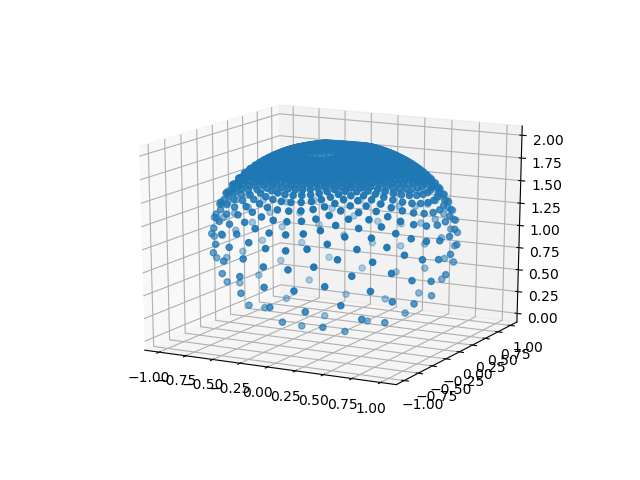

 E 
[0.0018958030037475998, 0.01361826206168884, 0.0016007409807833504, 0.0005851323822621145, 0.010553612351514655, 0.005780779067561947, 0.0007406143767320758, 0.005743458303201874, 0.0017041762949188853, 0.0020553496047334197, 0.003441067430631273, 0.002916846117714913, 0.5811993808525846, 0.0041731366361974186, 0.017836151064463162, 0.0015002747688689728, 0.0019518268436709701, 0.0029168461177149067, 0.0004526440127842187, 0.0025314547947226877, 0.003776357128910265, 0.003867047456738526, 0.7627414973880001, 0.002758879926549108, 0.061726924557489994, 0.0020697098751547784, 0.016531791412543947, 0.003841075269123716, 0.01834241517861836, 0.04681699205409874, 0.0012747026664395385, 0.004863326933432522, 0.0010237864433450946, 0.014544634990113246, 0.0017356079559114582, 0.0015250329906511166, 0.11012625106736838, 0.004173136636197409, 0.0014372122730255063, 0.0030639720977766903, 0.001600740980783355, 0.0011894251192995568, 0.0016932442240922278, 0.1071779325345452, 0.00353848171641

In [23]:
import random
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np


def parametroX(u, v):
    return (4 * u) / (u**2 + v**2 + 4)
def parametroY(u, v):
    return (4 * v) / (u**2 + v**2 + 4)
def parametroZ(u, v):
    return (2 * (u**2 + v**2)) / (u**2 + v**2 + 4)


def derivadaX(funcao, x_anterior, x_posterior, y, h):
    return (funcao(x_posterior, y) - funcao(x_anterior, y)) / (2*h)
def derivadaY(funcao, x, y_anterior, y_posterior, h):
    return (funcao(x, y_posterior) - funcao(x, y_anterior)) / (2*h)


def primeiraFF(u, v, h, amostra_pontos):
    dX, dY = [], []
    
    for k in range(len(amostra_pontos)):
        i, j = amostra_pontos[k]
        coordenadasX, coordenadasY = [], []

        coordenadasX.append(derivadaX(parametroX, u[i][j-1], u[i][j+1], v[i][j], h))
        coordenadasX.append(derivadaX(parametroY, u[i][j-1], u[i][j+1], v[i][j], h))
        coordenadasX.append(derivadaX(parametroZ, u[i][j-1], u[i][j+1], v[i][j], h))

        dX.append(coordenadasX)
        
        coordenadasY.append(derivadaY(parametroX, u[i][j], v[i-1][j], v[i+1][j], h))
        coordenadasY.append(derivadaY(parametroX, u[i][j], v[i-1][j], v[i+1][j], h))
        coordenadasY.append(derivadaY(parametroX, u[i][j], v[i-1][j], v[i+1][j], h))
        
        dY.append(coordenadasY)

    E, F, G = [], [], []

    for i in range(len(dX)):
        E.append(dX[i][0]**2 + dX[i][1]**2 + dX[i][2]**2)
        F.append(dX[i][0]*dY[i][0] + dX[i][1]*dY[i][1] + dX[i][2]*dY[i][2])
        G.append(dY[i][0]**2 + dY[i][1]**2 + dY[i][2]**2)
    
    return E, F, G


def dominio(esquerdo_x, direito_x, inferior_y, superior_y, qtd_pontos):
    x, y = np.linspace(esquerdo_x, direito_x, qtd_pontos), np.linspace(inferior_y, superior_y, qtd_pontos)   
    u, v = np.meshgrid(x, y)

    dominio_uv = []

    for i in range(1, qtd_pontos - 1):
        for j in range(1, qtd_pontos - 1):
            dominio_uv.append((i,j))
    
    return u, v, dominio_uv


def amostra(dominio_uv, qtd_pontos):
    random.shuffle(dominio_uv)
    
    qtd_dominio = len(dominio_uv)
    qtd_amostra = qtd_dominio - (qtd_dominio // 2)
    
    for i in range(qtd_amostra):
        dominio_uv.pop()
    
    return dominio_uv


def plotar2D(u, v, amostra_pontos = []):
    if len(amostra_pontos) == 0:
        plt.scatter(u,v)

        plt.show()
    else:
        amostraX, amostraY = [], []
        
        for k in range(len(amostra_pontos)):
            i, j = amostra_pontos[k]
            
            amostraX.append(u[i][j]) 
            amostraY.append(v[i][j])

        plt.scatter(amostraX,amostraY)

        plt.show()
    
    return None
    
    
def plotar3D(u, v, amostra_pontos = []):
    if len(amostra_pontos) == 0:
        X = parametroX(u,v)
        Y = parametroY(u,v)
        Z = parametroZ(u,v)

        plt.figure() .add_subplot(111, projection='3d') .scatter(X, Y, Z)

        plt.show()
    else:
        amostraX, amostraY, amostraZ = [], [], []
        
        for k in range(len(amostra_pontos)):
            i, j = amostra_pontos[k]
            
            amostraX.append(parametroX(u[i][j], v[i][j]))
            amostraY.append(parametroY(u[i][j], v[i][j]))
            amostraZ.append(parametroZ(u[i][j], v[i][j]))

        plt.figure() .add_subplot(111, projection='3d') .scatter(amostraX, amostraY, amostraZ)

        plt.show()

    return None


def main():
    esquerdo_x, direito_x = -10, 10
    inferior_y, superior_y = -10, 10
    qtd_pontos = 50
    
    u, v, dominio_uv = dominio(esquerdo_x, direito_x, inferior_y, superior_y, qtd_pontos)

    amostra_pontos = amostra(dominio_uv, qtd_pontos)

    #plotar2D(u, v)
    #plotar3D(u, v)
    #plotar2D(u, v, amostra_pontos)
    #plotar3D(u, v, amostra_pontos)

    h = u[0][1] - u[0][0]
    
    E, F, G = primeiraFF(u, v, h, amostra_pontos)

    print(" E ")
    print(E)
    print("\n F ")
    print(F)
    print("\n G ")
    print(G)

    return None


main()

In [ ]:
# testes automatizados, documentação
'''
    Documentação, o que a função abaixo faz, mas simplificado
'''

<IPython.core.display.Javascript object>


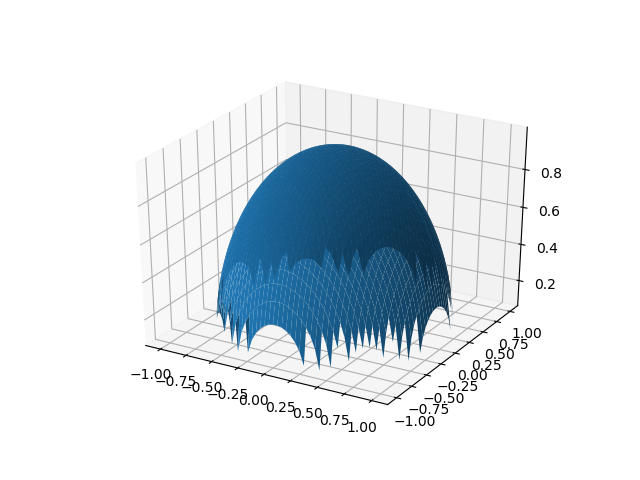

C:\Users\Carlos Eduardo\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]
C:\Users\Carlos Eduardo\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Z contains NaN values. This may result in rendering artifacts.


In [35]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

ax = plt.figure() .gca( projection = '3d' )

x = np.linspace(-1, 1)
y = np.linspace(-1, 1)

X, Y  = np.meshgrid(x, y)

Z = np.sqrt(1 - (X**2 + Y**2))



paraboloide = ax.plot_surface(X, Y, Z)

plt.show()

<IPython.core.display.Javascript object>


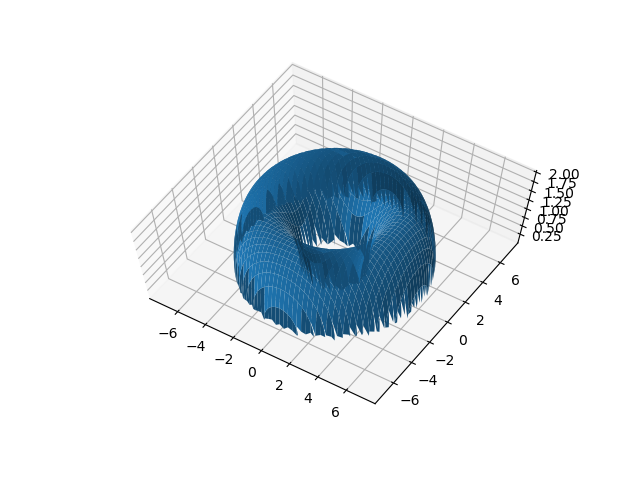

C:\Users\Carlos Eduardo\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app
C:\Users\Carlos Eduardo\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Z contains NaN values. This may result in rendering artifacts.


In [16]:
# aplicar também a parametrização polar
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

ax = plt.figure() .gca( projection = '3d' )

x = np.linspace(-7, 7, 1000)
y = np.linspace(-7, 7, 1000)

X, Y  = np.meshgrid(x, y)
Z = np.sqrt(4 - (4 - np.sqrt(X**2 + Y**2))**2)

paraboloide = ax.plot_surface(X, Y, Z)

plt.show()

# http://www.professores.uff.br/katiafrensel/wp-content/uploads/sites/115/2017/08/ga2-aula9.pdf

# Toro

In [42]:
import random
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook


def funcaoZ(X, Y):
    return np.sqrt(4 - (4 - np.sqrt(X**2 + Y**2))**2)


def derivadaX(x_anterior, x_posterior, y, h):
    return (funcaoZ(x_posterior,y) - funcaoZ(x_anterior,y)) / (2*h)  


def derivadaY(x, y_anterior, y_posterior, h):
    return (funcaoZ(x,y_posterior) - funcaoZ(x,y_anterior)) / (2*h)    


def primeiraFF(X, Y, h, amostra_pontos):
    dX, dY = [], []
    
    for k in range(len(amostra_pontos)):
        i, j = amostra_pontos[k]
        dX.append(derivadaX(X[i][j-1], X[i][j+1], Y[i][j], h))
        dY.append(derivadaY(X[i][j], Y[i-1][j], Y[i+1][j], h))

    E, F, G = [], [], []
    
    for i in range(len(dX)):
        E.append(dX[i]**2)
        F.append(dX[i]*dY[i])
        G.append(dY[i]**2)      
    
    return E, F, G


def dominio(esquerdo_x, direito_x, inferior_y, superior_y, qtd_pontos):
    x, y = np.linspace(esquerdo_x, direito_x, qtd_pontos), np.linspace(inferior_y, superior_y, qtd_pontos)   
    X, Y = np.meshgrid(x, y)
    
    truefalse = []
    truefalse.append([])
    
    for i in range(0, qtd_pontos):
        for j in range(0, qtd_pontos):
            if (4 - np.sqrt(X[i][j]**2 + Y[i][j]**2))**2 <= 4:
                truefalse[i].append(True)
            else:
                truefalse[i].append(False)
        
        truefalse.append([])
    
    dominioXY = []

    for j in range(1, qtd_pontos - 1):
        for i in range(1, qtd_pontos - 1):
            if truefalse[i-1][j] and truefalse[i+1][j] and truefalse[i][j-1] and truefalse[i][j+1]:
                dominioXY.append((i, j))
    
    return X, Y, dominioXY


def amostra(X, Y, dominioXY, qtd_pontos):
    random.shuffle(dominioXY)
    
    qtd_dominio = len(dominioXY)
    qtd_amostra = qtd_dominio // 2

    if qtd_dominio > qtd_amostra:
        for i in range(qtd_dominio - qtd_amostra):
            dominioXY.pop()

    return dominioXY


def plotar2D(X, Y, amostra_pontos = []):
    if len(amostra_pontos) == 0:
        plt.scatter(X,Y)

        plt.show()
    else:
        amostraX, amostraY = [], []
        
        for k in range(len(amostra_pontos)):
            i, j = amostra_pontos[k]
            
            amostraX.append(X[i][j]) 
            amostraY.append(Y[i][j])

        plt.scatter(amostraX,amostraY)

        plt.show()
    
    return None


def plotar3D(X, Y, Z, amostra_pontos = []):
    if len(amostra_pontos) == 0:   
        plt.figure() .add_subplot(111, projection='3d') .scatter(X, Y, Z)

        plt.show()
    else:
        amostraX, amostraY, amostraZ = [], [], []

        for k in range(len(amostra_pontos)):
            i, j = amostra_pontos[k]

            amostraX.append(X[i][j]) 
            amostraY.append(Y[i][j])
            amostraZ.append(Z[i][j])

        plt.figure() .add_subplot(111, projection='3d') .scatter(amostraX, amostraY, amostraZ)

        plt.show()

    return None


def main():
    esquerdo_x, direito_x = -7, 7
    inferior_y, superior_y = -7, 7
    qtd_pontos = 10
    X, Y, dominioXY = dominio(esquerdo_x, direito_x, inferior_y, superior_y, qtd_pontos)
    
    amostra_pontos = amostra(X, Y, dominioXY, qtd_pontos)
    
    #Z = funcaoZ(X, Y)
    #plotar2D(X, Y)
    #plotar3D(X, Y, Z)
    #plotar2D(X, Y, amostra_pontos)
    #plotar3D(X, Y, Z, amostra_pontos)
        
    
    h = X[0][1] - X[0][0]

    E, F, G = primeiraFF(X, Y, h, amostra_pontos)

    print(" E ")
    print(E)
    print("\n F ")
    print(F)
    print("\n G ")
    print(G)


    return None


main()

 E 
[0.000545229944438508, 0.04728512974106981, 0.04728512974106981, 0.18142708669745267, 0.043855640835935836, 0.043855640835936044, 0.04728512974106981, 0.00023458296278318203, 0.043855640835936044, 0.1814270866974536]

 F 
[-0.0003576334097431264, -0.09262182967871758, 0.09262182967871785, -0.09262182967871758, 0.043855640835935836, -0.04385564083593597, -0.09262182967871783, 0.0003576334097431264, 0.043855640835936044, -0.09262182967871783]

 G 
[0.00023458296278318203, 0.18142708669745267, 0.18142708669745372, 0.04728512974106981, 0.043855640835935836, 0.04385564083593589, 0.1814270866974536, 0.000545229944438508, 0.043855640835936044, 0.04728512974106981]


# Toro 2.0

In [64]:
import numpy as np

np.cos(0)

1.0

<IPython.core.display.Javascript object>


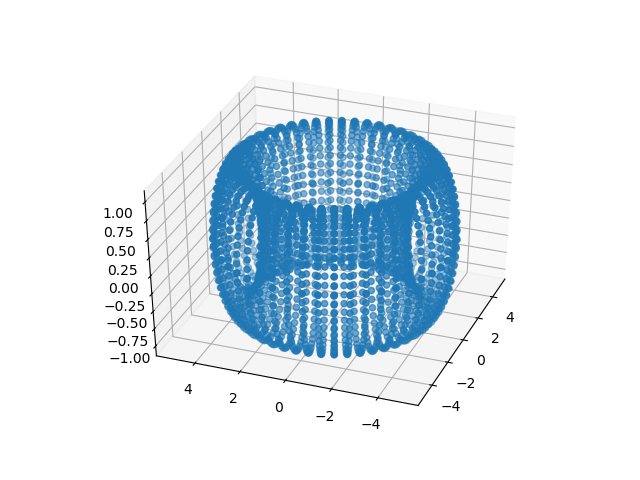

 E 
[0.9945311718196085, 0.9945311718196074, 0.994531171819601, 0.9945311718196006, 0.9945311718196033, 0.9945311718196037, 0.9945311718196006, 0.9945311718196008, 0.994531171819603, 0.9945311718196042, 0.9945311718196075, 0.9945311718196017, 0.9945311718196016, 0.9945311718196017, 0.9945311718196019, 0.9945311718196017, 0.9945311718195985, 0.9945311718196022, 0.9945311718196008, 0.9945311718196005, 0.9945311718196005, 0.9945311718195995, 0.9945311718196005, 0.9945311718196, 0.9945311718196032, 0.9945311718196017, 0.9945311718196023, 0.9945311718196027, 0.9945311718196006, 0.994531171819603, 0.9945311718196006, 0.994531171819601, 0.9945311718195998, 0.9945311718196042, 0.9945311718195998, 0.9945311718196022, 0.9945311718196009, 0.9945311718196035, 0.9945311718196027, 0.9945311718195995, 0.994531171819598, 0.9945311718195975, 0.9945311718196028, 0.9945311718196058, 0.9945311718195996, 0.9945311718195988, 0.9945311718196086, 0.9945311718196018, 0.9945311718195953, 0.9945311718196073, 0.9

In [24]:
import random
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook


def parametroX(u, v):
    return (4 + np.cos(u)) * np.sin(v)
def parametroY(u, v):
    return (4 + np.cos(u)) * np.cos(v)
def parametroZ(u, v):
    return np.sin(u)


def derivadaX(funcao, x_anterior, x_posterior, y, h):
    return (funcao(x_posterior, y) - funcao(x_anterior, y)) / (2*h)
def derivadaY(funcao, x, y_anterior, y_posterior, h):
    return (funcao(x, y_posterior) - funcao(x, y_anterior)) / (2*h)


def primeiraFF(u, v, h, amostra_pontos):
    dX, dY = [], []
    
    for k in range(len(amostra_pontos)):
        i, j = amostra_pontos[k]
        coordenadasX, coordenadasY = [], []
        
        coordenadasX.append(derivadaX(parametroX, u[i][j-1], u[i][j+1], v[i][j], h))
        coordenadasX.append(derivadaX(parametroY, u[i][j-1], u[i][j+1], v[i][j], h))
        coordenadasX.append(derivadaX(parametroZ, u[i][j-1], u[i][j+1], v[i][j], h))
        
        dX.append(coordenadasX)
        
        coordenadasY.append(derivadaY(parametroX, u[i][j], v[i-1][j], v[i+1][j], h))
        coordenadasY.append(derivadaY(parametroX, u[i][j], v[i-1][j], v[i+1][j], h))
        coordenadasY.append(derivadaY(parametroX, u[i][j], v[i-1][j], v[i+1][j], h))
        
        dY.append(coordenadasY)

    E, F, G = [], [], []

    for i in range(len(dX)):
        E.append(dX[i][0]**2 + dX[i][1]**2 + dX[i][2]**2)
        F.append(dX[i][0]*dY[i][0] + dX[i][1]*dY[i][1] + dX[i][2]*dY[i][2])
        G.append(dY[i][0]**2 + dY[i][1]**2 + dY[i][2]**2)
    
    return E, F, G


def dominio(esquerdo_x, direito_x, inferior_y, superior_y, qtd_pontos):
    x, y = np.linspace(esquerdo_x, direito_x, qtd_pontos), np.linspace(inferior_y, superior_y, qtd_pontos)   
    u, v = np.meshgrid(x, y)

    dominio_uv = []

    for i in range(1, qtd_pontos - 1):
        for j in range(1, qtd_pontos - 1):
            dominio_uv.append((i,j))
    
    return u, v, dominio_uv


def amostra(dominio_uv, qtd_pontos):
    random.shuffle(dominio_uv)
    
    qtd_dominio = len(dominio_uv)
    qtd_amostra = qtd_dominio - (qtd_dominio // 2)
    
    for i in range(qtd_amostra):
        dominio_uv.pop()
    
    return dominio_uv


def plotar2D(u, v, amostra_pontos = []):
    if len(amostra_pontos) == 0:
        plt.scatter(u,v)

        plt.show()
    else:
        amostraX, amostraY = [], []
        
        for k in range(len(amostra_pontos)):
            i, j = amostra_pontos[k]
            
            amostraX.append(u[i][j]) 
            amostraY.append(v[i][j])

        plt.scatter(amostraX,amostraY)

        plt.show()
    
    return None
    
    
def plotar3D(u, v, amostra_pontos = []):
    if len(amostra_pontos) == 0:
        X = parametroX(u,v)
        Y = parametroY(u,v)
        Z = parametroZ(u,v)

        plt.figure() .add_subplot(111, projection='3d') .scatter(X, Y, Z)

        plt.show()
    else:
        amostraX, amostraY, amostraZ = [], [], []
        
        for k in range(len(amostra_pontos)):
            i, j = amostra_pontos[k]
            
            amostraX.append(parametroX(u[i][j], v[i][j]))
            amostraY.append(parametroY(u[i][j], v[i][j]))
            amostraZ.append(parametroZ(u[i][j], v[i][j]))

        plt.figure() .add_subplot(111, projection='3d') .scatter(amostraX, amostraY, amostraZ)

        plt.show()

    return None


def main():
    esquerdo_x, direito_x = 0, 2 * np.pi
    inferior_y, superior_y = 0, 2 * np.pi
    qtd_pontos = 50

    u, v, dominio_uv = dominio(esquerdo_x, direito_x, inferior_y, superior_y, qtd_pontos)

    amostra_pontos = amostra(dominio_uv, qtd_pontos)

    #plotar2D(u, v)
    plotar3D(u, v)
    #plotar2D(u, v, amostra_pontos)
    #plotar3D(u, v, amostra_pontos)

    h = u[0][1] - u[0][0]
    
    E, F, G = primeiraFF(u, v, h, amostra_pontos)

    print(" E ")
    print(E)
    print("\n F ")
    print(F)
    print("\n G ")
    print(G)

    return None


main()